# Esercizio 11.1

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Data generation
With this I'm generating the data that the NN will use to train and test. 
To generate realistic data, Gaussian noise centered around the exact value of the function was added.

In [1]:
#f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3 
c = -2
d = 3

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c * x_train * x_train + d * x_train * x_train * x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid, sigma)

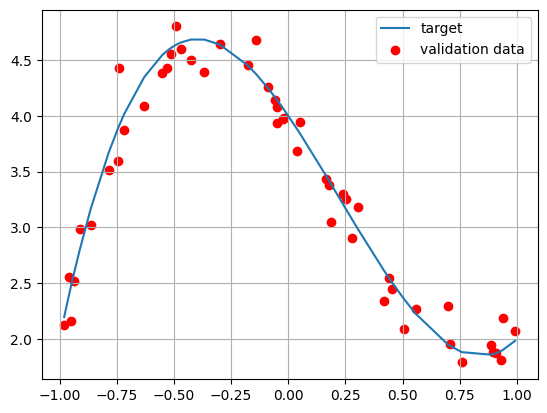

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

### The actual network
The architecture consists of three fully connected layers. The network receives as input a vector of dimension 1, which is then processed through the layers. After each layer, the ReLU (Rectified Linear Unit) activation function is applied.
The structure can be summarized as follows:
1. The first layer takes the one-dimensional input and maps it to a set of neurons.
2. The second layer contains the same number of neurons as the first one.
3. The third layer reduces the output to a single neuron.

For optimization, the model employs the Adam method, described in the Keras documentation as a variant of stochastic gradient descent that adapts learning rates using estimates of first- and second-order moments. The loss function chosen is the Mean Squared Error (MSE), which is standard for regression tasks.


In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu')) # input layer with one neuron and linear activation
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

/Users/marta/Documents/LSN/.conda/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8424 - mse: 11.8424 - val_loss: 9.8335 - val_mse: 9.8335
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8473 - mse: 9.8473 - val_loss: 6.7319 - val_mse: 6.7319
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2162 - mse: 6.2162 - val_loss: 2.7801 - val_mse: 2.7801
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5256 - mse: 2.5256 - val_loss: 1.2241 - val_mse: 1.2241
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0523 - mse: 1.0523 - val_loss: 1.1208 - val_mse: 1.1208
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8699 - mse: 0.8699 - val_loss: 0.9668 - val_mse: 0.9668
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8244 - mse: 0.8244 - val_loss: 0.8723 - val_mse: 0.8723
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6307 - mse: 0.6307 - val_loss: 0.7426 - val_mse: 0.7426
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0361 - mse: 0.0361

Test loss: 0.03509038686752319
Test accuracy: 0.03509038686752319


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mse: 0.0012

Test loss: 0.001265757717192173
Test accuracy: 0.001265757717192173


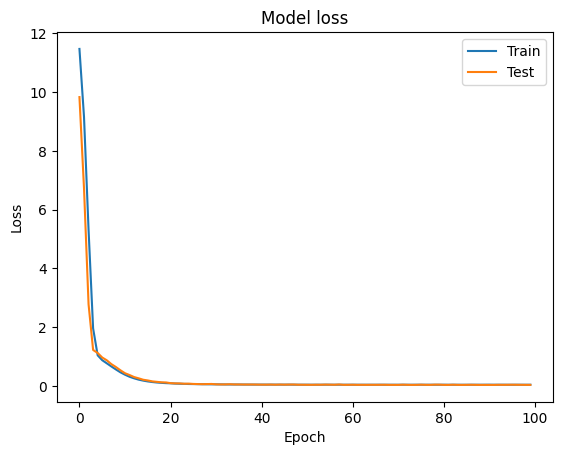

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

The plots display the loss function for both the training and validation datasets. As expected, the validation loss is consistently higher than the training loss. Nevertheless, the validation loss (labeled Test in the plot) remains relatively low, indicating that the model generalizes well to unseen data. The loss exhibits a saturation effect: after approximately 20 epochs, no significant improvement is observed.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


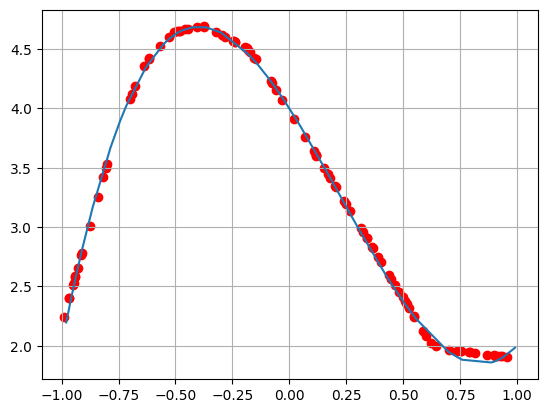

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Here we can see how the neural network is able to learn the cubic function with good accuracy, even if we have not explicitly said that the function is cubic. The network has inferred this from the training data.